In [15]:
import pandas as pd
from sklearn import preprocessing
import xgboost as xg
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 
import warnings
import numpy as np
import sqlite3
import json
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

warnings.filterwarnings('ignore')

In [16]:
db = sqlite3.connect('predictor_pol/predictor_prod.db', isolation_level=None)
sql = '''
select candidato_elegido as id_candidato
from encuestas;
'''
df = pd.read_sql_query(sql, db)

In [17]:
cand_data = json.loads(open('predictor_pol/candidatos.json','r').read())

In [18]:
def get_party(id):
    for p in cand_data:
        for c in p['candidates']:
            if c['id'] == id:
                return p['party']
    return 'n/a'

def get_name(id):
    for p in cand_data:
        for c in p['candidates']:
            if c['id'] == id:
                return c['name']
    return 'n/a'

In [19]:
df['partido'] = df.id_candidato.apply(get_party)
df['nombre'] = df.id_candidato.apply(get_name)
df

,id_candidato,partido,nombre
0,16,Partido Colorado,Julio María Sanguinetti
1,9,Partido Nacional,Luis Lacalle Pou
2,4,Frente Amplio,Daniel Martínez
3,19,Unidad Popular,Gonzalo Abella
4,18,La Alternativa,Pablo Mieres
5,20,Partido de la Gente,Edgardo Novick
6,17,Partido Colorado,Ernesto Talvi
7,4,Frente Amplio,Daniel Martínez
8,3,Frente Amplio,Carolina Cosse
9,3,Frente Amplio,Carolina Cosse


In [20]:
df.groupby('partido').size()

partido
Frente Amplio          9
La Alternativa         1
Partido Colorado       3
Partido Nacional       1
Partido de la Gente    2
Unidad Popular         1
dtype: int64

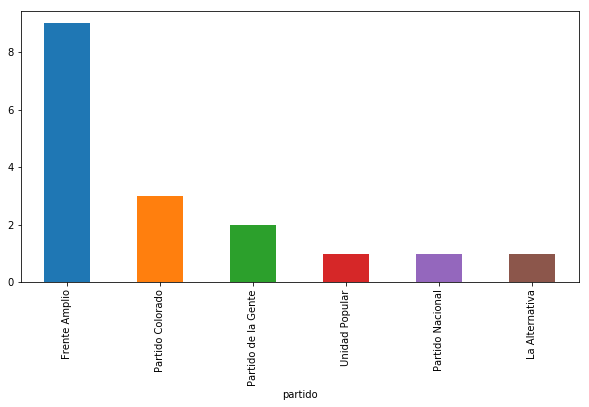

In [21]:
df.groupby('partido').size().sort_values(ascending=False).plot.bar()

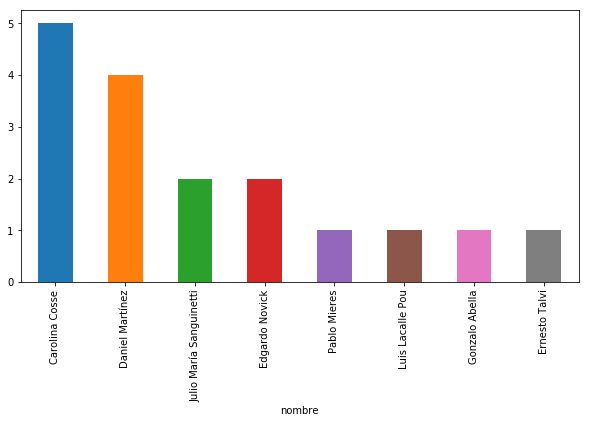

In [22]:
df.groupby('nombre').size().sort_values(ascending=False).plot.bar()

In [25]:
#probando el modelo...
#4,5,candidato1
#3,5,candidato1
#4,3,candidato1
#1,5,candidato2
#2,5,candidato2

In [26]:
data = {'resp1': [4,3,4,1,2], 
        'resp2': [5,5,3,5,5],
        'candidato': ['candidato1','candidato1','candidato1','candidato2','candidato2']}
df = pd.DataFrame.from_dict(data)

In [27]:
df

,candidato,resp1,resp2
0,candidato1,4,5
1,candidato1,3,5
2,candidato1,4,3
3,candidato2,1,5
4,candidato2,2,5


In [28]:
features = ['resp1', 'resp2']
model = xg.XGBClassifier().fit(df[features], df.candidato)

In [37]:
df_test = pd.DataFrame.from_dict({'resp1': [1], 'resp2': [1]})
model.predict(df_test)

array(['candidato1'], dtype=object)